In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option("max_columns",250)

In [3]:
wnba = pd.read_csv("wnba.csv")
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,3,9,12,12,7,0,14,50,0,0


In [4]:
wnba.Experience.dtype

dtype('O')

In [5]:
wnba.Experience.unique()

array(['2', '12', '4', '6', 'R', '8', '5', '3', '1', '9', '10', '11', '7',
       '13', '14', '15'], dtype=object)

In [6]:
wnba.Experience.value_counts(dropna = False)

R     23
3     19
6     14
5     14
1     12
2     11
9     11
4     11
10     5
12     4
11     4
7      4
8      3
14     3
13     3
15     2
Name: Experience, dtype: int64

In [7]:
pd.isnull(np.nan)

True

In [8]:
def category(x):
    
    if pd.isnull(x):
        return "Rookie"
    elif 0 < x <= 3:
        return "Little Experience"
    elif 3 < x <= 5:
        return "Experienced"
    elif 5 < x <= 10:
        return "very Experienced"
    elif x > 10:
        return "Veteran"

In [9]:
pd.to_numeric(wnba["Experience"], errors = "coerce").value_counts(dropna = False)


NaN     23
3.0     19
5.0     14
6.0     14
1.0     12
9.0     11
4.0     11
2.0     11
10.0     5
7.0      4
11.0     4
12.0     4
14.0     3
13.0     3
8.0      3
15.0     2
Name: Experience, dtype: int64

In [10]:
wnba["Exp_ordinal"] = pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)
wnba["Exp_ordinal"].value_counts()

Little Experience    42
very Experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

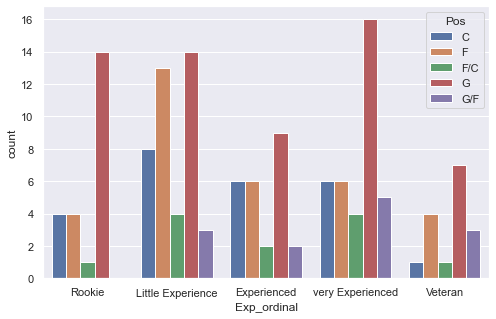

In [25]:
fig = plt.figure(figsize=(8,5))

sns.countplot(data = wnba ,x="Exp_ordinal", \
              order = ["Rookie","Little Experience","Experienced",\
                       "very Experienced","Veteran"],
             hue="Pos", hue_order = ["C","F","F/C","G","G/F"])

plt.show()

In [12]:
wnba["MIN"].mean(), wnba["Age"].mean()

(496.97202797202794, 27.076923076923077)

In [13]:
def min_ordinal(x):
    if x >= 497:
        return "average or above"
    else:
        return "below average"

In [14]:
wnba["min_mean_relative"] = wnba["MIN"].apply(\
            lambda x: "average or above" if x >= 497 else "below average")
wnba[["MIN","min_mean_relative"]].head()

,MIN,min_mean_relative
0,173,below average
1,947,average or above
2,617,average or above
3,721,average or above
4,137,below average


In [15]:
wnba["age_mean_relative"] = wnba["Age"].apply(\
                            lambda x:"Vetern" if x >=27 else "Rookie")
wnba[["Age","age_mean_relative"]].head()

,Age,age_mean_relative
0,23,Rookie
1,35,Vetern
2,26,Rookie
3,28,Vetern
4,23,Rookie


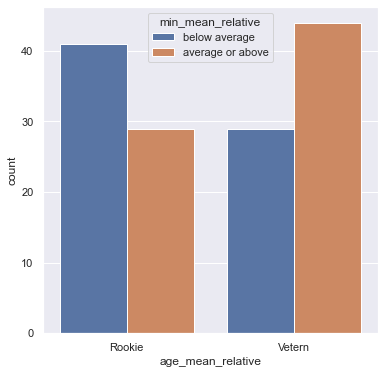

In [16]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x="age_mean_relative", hue = "min_mean_relative", data=wnba)
plt.show()

In [17]:
lst = [4,6,8,15]

sum(lst)/len(lst)

8.25

In [18]:
lst = [1,3,2,27]

sum(lst)/len(lst)

8.25

In [19]:
15-4

11

In [20]:
27-1

26

In [21]:
8.25 + 3 , 8.25 - 3

(11.25, 5.25)

In [22]:
8.25 + 6 , 8.25 - 6

(14.25, 2.25)

In [23]:
8.25 + 9 , 8.25 - 9

(17.25, -0.75)